<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/Intro_fitting_kinetics_5721_au21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to data fitting in Python for Biochem 5721 - AU21; Foster
This notebook is intended to serve as a tutorial guide for introducing students to data fitting in Python. It is by no means a complete description of capabilities or possibilities for data analysis in Python, but hopefully provides some useful guides and examples. 

Have fun! 2021-11-07 MPF

## Data fitting with Python, using Matplotlib and Pandas
We will start with data for the first-order decomposition of penicillin during storage at 25°C. The data can be loaded from a file, or entered as lists of $x$ and $y$ values. We will read the values from a _.csv_ (comma separated values) file available on Carmen/Canvas

We will read in the data using the `pandas` package, https://pandas.pydata.org/. Pandas simplifies loading tabular data into a "data frame"; basically a table with rows and columns. For this example, we will load a `.csv` (comma-separated-values) file that looks like this:
```
Time_weeks,Penicillin_U
0.0,10100
1.0,8180
2.0,6900
3.0,5380
4.0,4320
5.0,3870
7.0,2190
8.0,2000
9.0,1790
10.0,1330
11.0,1040
12.0,898
13.0,750
14.0,572
15.0,403
16.0,403
17.0,314
18.0,279
19.0,181
20.0,167
```
The first row has column labels; the rest are data. We can drag/drop the file into the Jupter file window, tell Pandas to load the data in the file into a data frame. [(See Pandas docs.)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html)

In [1]:
# use pandas to load the data from a local file
import pandas as pd
df = pd.read_csv("penicillin-data.csv") # here, assumes file in current directory
df  # print out the data frame

,Time_weeks,Penicillin_U
0,0.0,10100
1,1.0,8180
2,2.0,6900
3,3.0,5380
4,4.0,4320
5,5.0,3870
6,7.0,2190
7,8.0,2000
8,9.0,1790
9,10.0,1330


In [2]:
Penicillin_U = list(df['Penicillin_U'])
Time_weeks = list(df['Time_weeks'])

In [3]:
# Alternatively, uncomment the next two lines to define the data
#Time_weeks =  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
#Penicillin_U =  [10100, 8180, 6900, 5380, 4320, 3870, 2190, 2000, 1790, 1330, 1040, 898, 750, 572, 403, 403, 314, 279, 181, 167]

and... plot the data:

Text(0, 0.5, 'Penicillin Units')

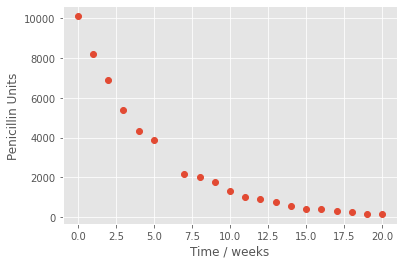

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # one of many available plot styles
plt.plot(Time_weeks, Penicillin_U, 'o') # plot the data using a scatter plot
plt.xlabel('Time / weeks'); plt.ylabel('Penicillin Units')

## Fitting to a model
We've hypothesized that the data can be described by a first-order kinetic process, whose integrated form is:

$$[A]=[A_0]e^{-kt}$$

where $[A_0]$ the value of [A] at time $t = 0$, and $k$ is the first order rate constant. We see from the data that $[A_0]= 10,100$. We just need a value of $k$ that best explains the data.

We will write out the integrated rate equation in a form that Python will understand. We will do this in the form of a _function_, so we can call and re-use the function by name; e.g., the square root function `sqrt()`.

In [5]:
# Let's define some functions for fitting exponential decay data

import numpy as np
  
def decay_1p(x,k):
  # one-parameter exponential decay, with rate constant k
  return np.exp(-k*x)

def decay_2p(x,k,A):
  # two-parameters exponential decay, with amplitude A
  return A*np.exp(-x*k)

def decay_3p(x,k,A,C):
  # three-parameter exponential decay, with amplitude A and baseline C
  return A*np.exp(-x*k) + C

def biphasic(x,k1,A1,k2,A2,C): # two rate constants, two amplitudes + C
  return A1*np.exp(-x*k1)+A2*np.exp(-x*k2)+C

def sec_order_1(t,a0,k): # 2a -> c
    return a0/(a0*k*t+1)

def sec_order_2(t,a0,b0,k): # a + 2b -> c
    return a0*b0*(np.exp(k*t*(a0 - b0)) - 1)/(a0*np.exp(k*t*(a0 - b0)) - b0)

Having defined a function, it can be useful to guess some parameters for the model and plot the model along with the data.

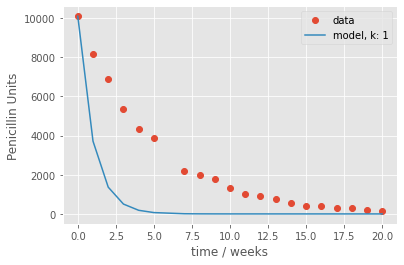

In [20]:
# often if we can't guess a good value for k, 1 is a good starting point.
a0=10100; k =1
t = np.array(Time_weeks)
data = np.array(Penicillin_U) # turn lists into arrays for easier math
calc_y = a0*decay_1p(t, k)
# now plot the measured and calculated values against the same x values:
plt.plot(t, data,'o', label='data')
plt.plot(t, calc_y, label='model, k: %g' %k)
plt.xlabel('time / weeks'); plt.ylabel('Penicillin Units')
plt.legend(); plt.show()

We evaluate the goodness of fit by computing a chi-square ($\chi^2$), the squared sum of the residual differences between the data ($y$ values) and the model evaluated at each $x$ value, $f(x)$:
$$\chi^2 =  \sum_i\left(y(x)-f(x)\right)^2 = \sum_i (residuals)^2$$


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


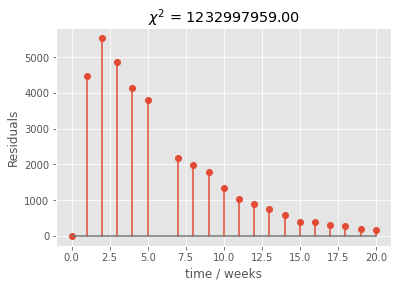

In [21]:
residuals = data - calc_y
plt.stem(t,residuals)
plt.xlabel('time / weeks'); plt.ylabel('Residuals')
plt.title('$\chi^2$ = %.2f' % (sum(residuals))**2 )
plt.show()

Fitting involves finding parameters that generate a best fit between the data and the model. Because an exponential decay equation  is not a straight line, we call this non-linear curve fitting.

There are many algorithms and packages for curve fitting; here we use Scipy curve_fit:

[0.20362823] [[4.25476874e-06]]


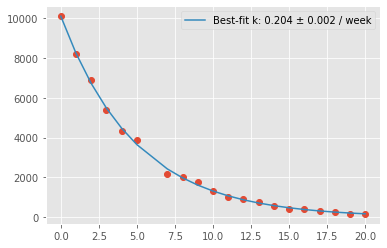

In [23]:
from scipy.optimize import curve_fit
'''
<function: scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
    check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>

for scipy's curve_fit function: we need to at least provide the function f, and x and y data.
we could provide initial parameters via p0
'''
f = decay_1p # specify the function to be used to generate model data
xdata = t # x values to evaluate
ydata = data/a0 # data to compare
p0 = 1 # optionally, provide starting parameters
popt,pcov = curve_fit(f,xdata,ydata, p0 = p0) # run, and return parameter best-fit and covariation
print(popt,pcov)
# Standard deviation estimate:
perr = np.sqrt(np.diag(pcov))
# Always, always, look at the quality of the fit before the parameters:
ydata = a0*f(xdata,*popt) # we evaluate the function f at each xval 
plt.plot(t,data,'o')
plt.plot(xdata,ydata, label='Best-fit k: %.3f ± %.3f / week' % (popt[0], perr))
plt.legend()
#print('Linear-fit of LB V_max: %.2f pmol/min, K_M: %.2g pmol/µL' % (pars_LB[0],pars_LB[1]))
#print('Direct-fit of MM V_max: %0.2f pmol/min and K_M: %0.2g pmol/µL' % (popt[0],popt[1]))

When we are satisfied with the agreement between model and data, we have found the _best-fit parameters of the model_.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


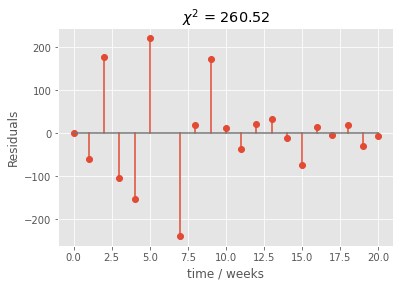

In [24]:
residuals = data - ydata
plt.stem(t,residuals)
plt.xlabel('time / weeks'); plt.ylabel('Residuals')
plt.title('$\chi^2$ = %.2f' % (sum(residuals))**2 )
plt.show()

In [25]:
# Standard deviation estimate:
perr = np.sqrt(np.diag(pcov))
perr

array([0.00206271])

Fitting involves finding parameters that generate a **best fit** between the _data_ and the _model_. Because the Hill equation model is not a straight line, we call this _non-linear curve fitting_. (The mathematics for linear regression is much more straightforward.)

There's more than one way to perform nonlinear fitting in python, and we will use the `lmfit` package https://lmfit.github.io/lmfit-py/ to generate the model and perfom fitting. `lmfit` has some nice features but is not a standard package in most python installations (it is built on other standard packages, especially `numpy` and `scipy`), and therefore needs to be installed (esp. for use in Colab). From a Jupyter Notebook, packaged installation can often be accomplished using [`pip`, the package installer for Python](https://pypi.org/project/pip/), which will search online databases for named packages, and install them if possible:
```
>>> !pip install lmfit
```


In [26]:
# install lmfit
!pip install lmfit

     |████████████████████████████████| 292 kB 33.2 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84401 sha256=d72781200fedf99ba37a75f3c8cd595bd306632a68e439d49697b68a47c5add2
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=4f85d60c1f1ec69d7bf049754746d4ca7d06c2eab5e838965885cee419c781bf
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


To fit the data with the model, we have to define a _fitting object_ that is programmed with the mathematical model (here, the Hill equation), and parameters are independent (not to be optimized).

In [34]:
from lmfit import Model #, Parameter, report_fit  # import the desired components
x = t; data = data # x and y vectors
dmodel = Model(decay_2p, independent_vars=['x'])
params = dmodel.make_params()
params.add('A', value=10100, vary=False)
result = dmodel.fit(data, params, x=x, k=1, A=10100) 
# ^^ here we guess some starting values, perform fit and store result ...
# ... in a Python oject, here called 'result'
result # output the contents of the result object

Next, we plot the data, along with the best-fit model, and the residuals; ALWAYS visually inspect the data, fit and residuals before interpreting parameters.

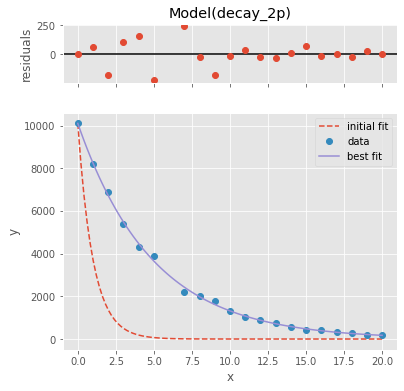

In [35]:
result.plot(numpoints=100, show_init=True) # numpoints for the best fit curve 
plt.show()

The best-fit parameters and other statistics are printed above, and can be individually accessed by name:

In [39]:
print('Best-fit k: {:.3f}'.format(result.params['k'].value))

Best-fit k: 0.204


If desired, we can append to the dataframe the initial values, best-fit, and residuals of the fit:

In [40]:
df['init'] = result.init_fit
df['best'] = result.best_fit
df['residuals'] = result.residual
df.head()

,Time_weeks,Penicillin_U,init,best,residuals
0,0.0,10100,10100.000000,10100.000000,0.000000
1,1.0,8180,3715.582356,8239.232456,59.232456
2,2.0,6900,1366.886361,6721.282323,-178.717677
3,3.0,5380,502.849391,5482.990838,102.990838
4,4.0,4320,184.987953,4472.835254,152.835254


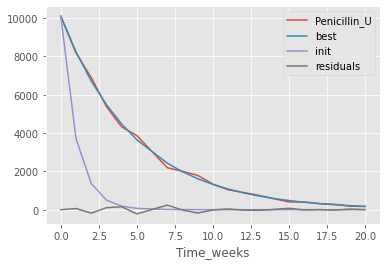

In [43]:
# shortcut to plotting data in the df (if created)
# df.plot(x='Time_weeks', y=['Penicillin_U','best','init','residuals'])